In [1]:
%matplotlib inline
import sys
sys.path.append("../")
import tensorflow as tf
import numpy as np
from datasets import Boston

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Objective
> 텐서플로우를 활용하여, 선형회귀 문제를 풀어보기

## 데이터 탐색

In [2]:
#Boston Dataset 가져오기
boston = Boston()

### 데이터셋에 대한 설명

In [3]:
# 데이터셋에 대한 설명
boston.description()

이 데이터셋은 보스턴 지역 내 구역별 집값과 집값에 관련된 특징들을 추출한 데이터셋으로
총 506개의 케이스가 존재한다.
데이터는
총 13개의 feature와
1 개의 target(MEDV)로 구성되어있다.

feature list ----

CRIM - 범죄 발생율
ZN - 25,000 평방피트 초과 주거지 비율
INDUS - 비소매업 면적 비율.
CHAS - 찰스강 근처 인지 유무 
NOX - 대기 중 NOx 비율
RM - 주거지의 평균 방 갯수
AGE - 1940년 이전 건축된 주택의 비율
DIS - 근무지와의 접근 용이성
RAD - 고속도로 접근 용이성
TAX - 재산세 비율($10,000)
PTRATIO - 학생-선생 비율
B - 지역 내 흑인 비율 (1000(Bk - 0.63)^2)
LSTAT - 인구 중 하위 계층 비율
MEDV - 자가 주택 가격 중간값(단위 : $1000)



모든 Feature에 대해 간단히 특징들을 요약하면 아래와 같다

In [4]:
boston.summary()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 변수 별 히스토그램

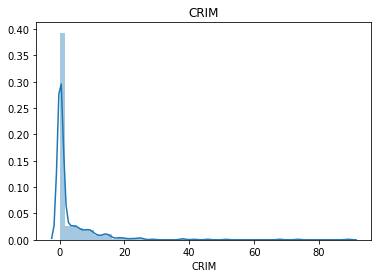

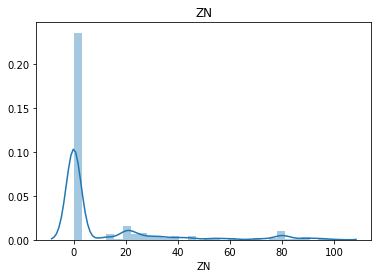

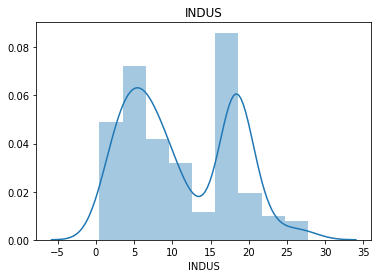

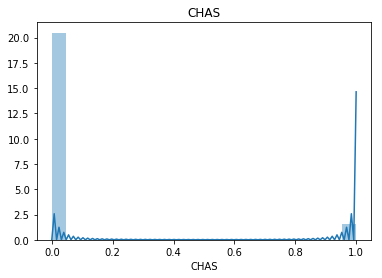

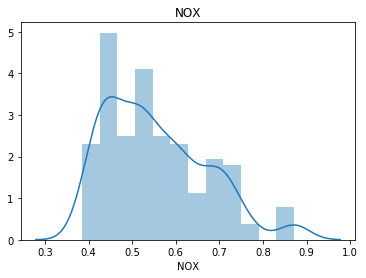

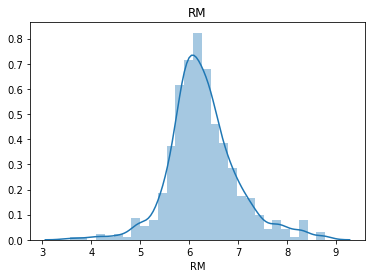

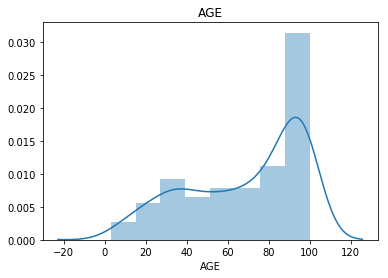

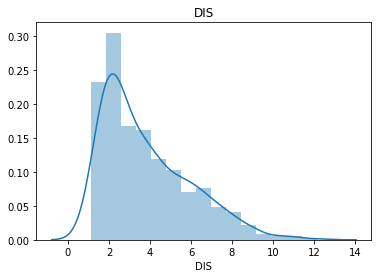

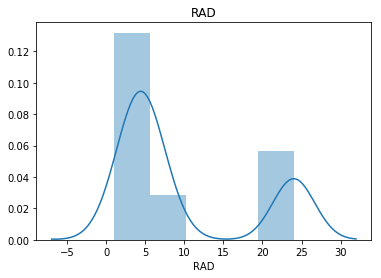

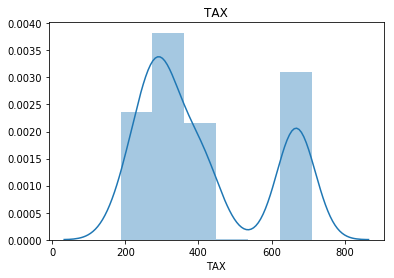

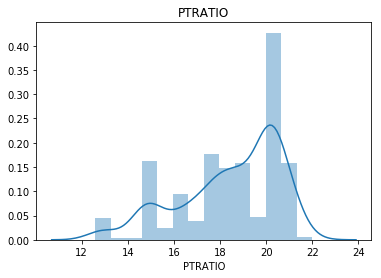

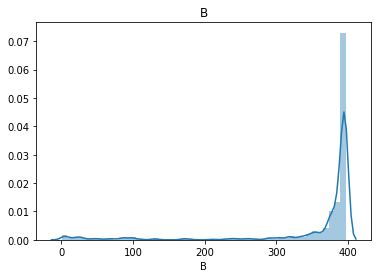

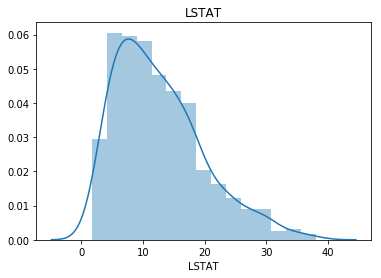

In [5]:
for feature_name in boston.features:
    boston.hist(feature_name)
    plt.show()

각 Feature는 위와 같은 분포를 가지고 있다.

## 변수 간 산포도

Target 변수인 `MEDV`와 Feature들 간의 관계를 산포도를 통해 바라봄으로써, 어떤 관계에 놓여있는지를 확인해보자

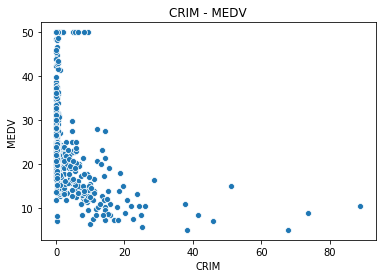

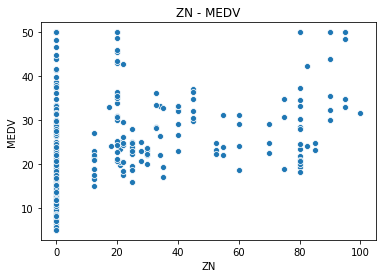

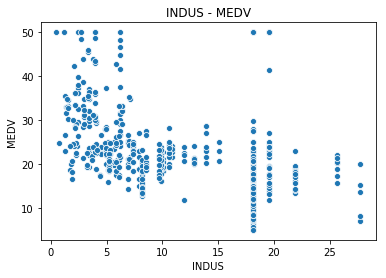

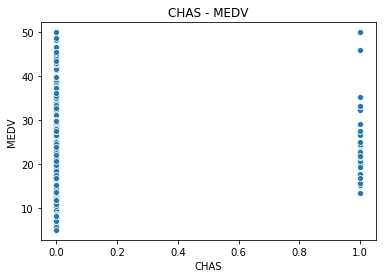

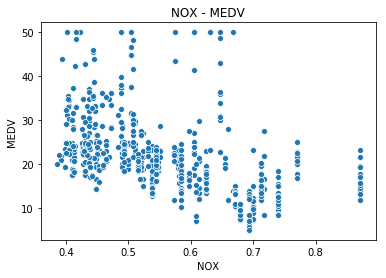

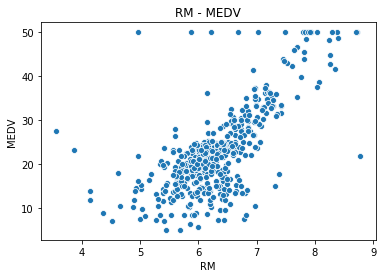

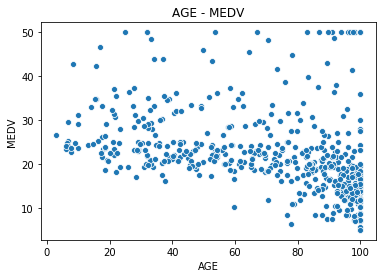

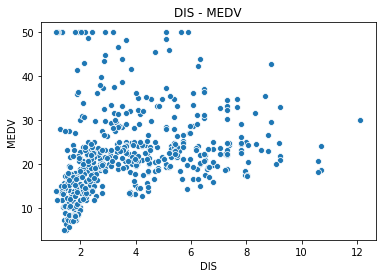

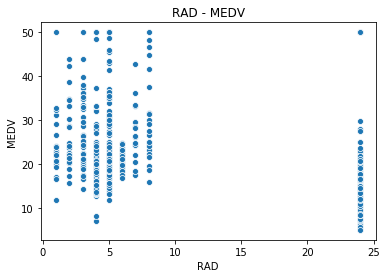

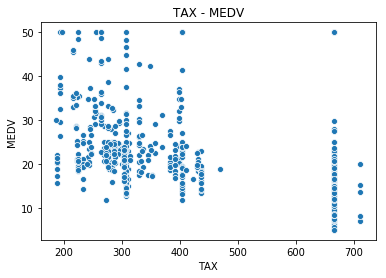

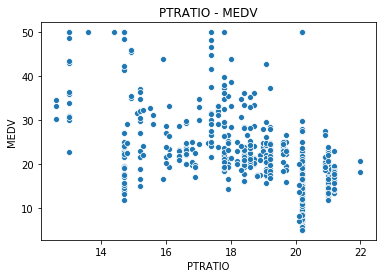

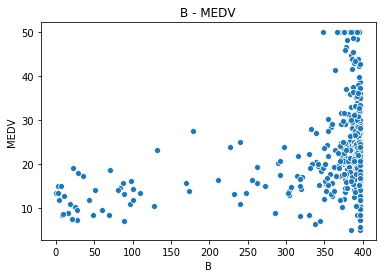

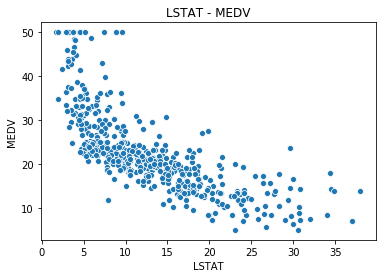

In [6]:
for feature_name in boston.features:
    boston.scatter(feature_name, 'MEDV')

## 단항 선형 회귀

선형 관계가 뚜렷하게 나타나는 Feature로는 평균 방의 갯수인 `RM`이 있다.

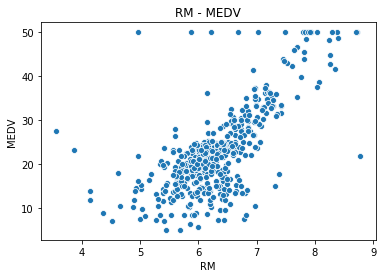

In [7]:
boston.scatter("RM", 'MEDV')

RM을 활용하여 MEDV를 예측하는 선형회귀를 그려보자

In [8]:
# feature과 target 가져오기
feature = boston['RM']
target = boston['MEDV']

feature_train, feature_test, target_train, target_test = train_test_split(
feature, target, test_size=0.3, random_state=2)

### Build the Graph

In [9]:
graph = tf.Graph()

with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None,),name='X')
    y = tf.placeholder(tf.float32, shape=(None,),name='y')
    W = tf.Variable(1.,name='Weight')
    b = tf.Variable(0.,name='bias')

    y_pred = W * X + b

    error = tf.subtract(y_pred, y,name='error')
    rmse = tf.reduce_mean(tf.square(error),name='rmse')
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(rmse)

### Run The Graph

In [10]:
with tf.Session(graph=graph) as sess:
    # Weight와 Bias를 초기화
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(1000):
        # 학습
        sess.run(train_op,{
            X: feature_train,
            y: target_train
        })
        
        if i % 100 == 0:
            loss = sess.run(rmse,{
                X: feature_test,
                y: target_test
            })           
            print("{:3d}th rmse : {:3.3f}".format(i,loss))
    
    # 학습된 weight와 bias 가져오기
    weight = W.eval()
    bias = b.eval()
    
    print("\nresult\n",
          " weight   : {:2.2f}\n".format(weight),
          " bias     : {:2.2f}\n".format(bias),
          " 최종 Loss : {:2.2f}".format(loss))

  0th rmse : 295.005
100th rmse : 58.460
200th rmse : 58.382
300th rmse : 58.304
400th rmse : 58.227
500th rmse : 58.150
600th rmse : 58.074
700th rmse : 57.998
800th rmse : 57.922
900th rmse : 57.846

result
  weight   : 3.71
  bias     : -0.38
  최종 Loss : 57.85


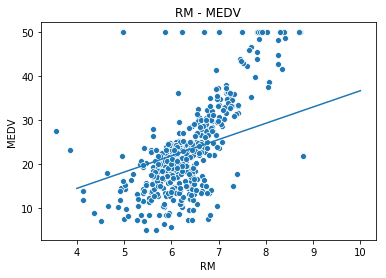

In [11]:
# weight와 bias를 바탕으로 그리기
# x=4, x=10일 때 각각 점을 찾아 두 점을 잇는 직선을 그리기
x_ = [4,10]
y_ = [weight*x+bias for x in x_]

plot = boston.scatter("RM", 'MEDV',plot_return=True)
plt.plot(x_,y_)
plt.show()

밀집되어 있는 가운데를 기점으로 선형적으로 선이 그어져 있다.

## 다항 선형 회귀

선형성이 보이는 3개의 Feature들을 활용하여, 어떤 식으로 Loss가 줄어드는지 확인해보자

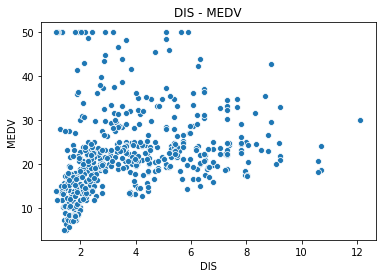

In [12]:
boston.scatter("DIS", 'MEDV')

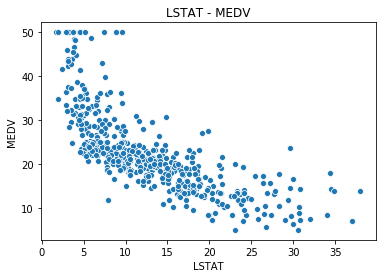

In [13]:
boston.scatter("LSTAT", 'MEDV')

### Load the Dataset

In [14]:
# feature과 target 가져오기
target_features = ['RM','DIS','LSTAT']
features = boston[target_features]
target = boston['MEDV']

feature_train, feature_test, target_train, target_test = train_test_split(
features, target, test_size=0.3, random_state=2)

### Build The Graph

In [15]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None,3),name='X')
    y = tf.placeholder(tf.float32, shape=(None,),name='y')
    
    bias_init = np.random.random((1)).astype(np.float32)
    b = tf.Variable(bias_init,name='bias')
    weight_init = np.random.random((3,1)).astype(np.float32)
    W = tf.Variable(weight_init,name='Weight')
    
    y_pred = tf.matmul(X,W) + b
    y_pred = tf.squeeze(y_pred, axis=1) # Convert : (None,1) -> (None,)
    error = tf.subtract(y_pred, y,name='error')
    rmse = tf.reduce_mean(tf.square(error),name='rmse')
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(rmse)

### Run the Graph

In [16]:
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(1000):
        sess.run(train_op,{
            X: feature_train,
            y: target_train
        })
        if i % 100 == 0:
            loss = sess.run(rmse,{
                X: feature_test,
                y: target_test
            })
            print("{:3d}th rmse : {:3.3f}".format(i,loss))
        
    weight = W.eval()
    bias = b.eval()
    print("\nResult\n",
        " Weight: [{:2.2f},{:2.2f},{:2.2f}]\n".format(*weight[:,0]),
        " Bias: {:2.2f}\n".format(bias[0]),
        " Loss : {:2.2f}".format(loss))

  0th rmse : 213.854
100th rmse : 36.029
200th rmse : 30.746
300th rmse : 28.909
400th rmse : 28.287
500th rmse : 28.109
600th rmse : 28.083
700th rmse : 28.102
800th rmse : 28.128
900th rmse : 28.150

Result
  Weight: [5.09,-0.46,-0.71]
  Bias: 1.19
  Loss : 28.15


훨씬 더 Loss가 줄어들어드는 것을 알 수 있다.

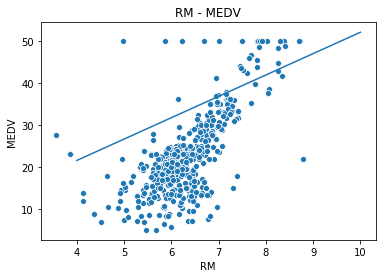

In [17]:
# weight와 bias를 바탕으로 그리기
# x=4, x=10일 때 각각 점을 찾아 두 점을 잇는 직선을 그리기
x_ = [4,10]
y_ = [weight[0]*x+bias for x in x_]

plot = boston.scatter("RM", 'MEDV',plot_return=True)
plt.plot(x_,y_)
plt.show()
plt.show()

### 모든 Feature를 활용해서 Linear Regression 하기

In [18]:
# feature과 target 가져오기
target_features = list(boston.features)
features = boston[target_features]
target = boston['MEDV']

feature_train, feature_test, target_train, target_test = train_test_split(
features, target, test_size=0.3, random_state=2)

In [19]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=(None,13),name='X')
    y = tf.placeholder(tf.float32, shape=(None,),name='y')
    
    bias_init = np.random.random((1)).astype(np.float32)
    b = tf.Variable(bias_init,name='bias')
    weight_init = np.random.random((13,1)).astype(np.float32)
    W = tf.Variable(weight_init,name='Weight')
    
    y_pred = tf.matmul(X,W) + b
    y_pred = tf.squeeze(y_pred, axis=1) # Convert : (None,1) -> (None,)
    error = tf.subtract(y_pred, y,name='error')
    rmse = tf.reduce_mean(tf.square(error),name='rmse')
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000003)
    train_op = optimizer.minimize(rmse)

In [20]:
with tf.Session(graph=graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(200000):
        sess.run(train_op,{
            X: feature_train,
            y: target_train
        })
        if i % 5000 == 0:
            loss = sess.run(rmse,{
                X: feature_test,
                y: target_test
            })
            print("{:5d}th rmse : {:3.3f}".format(i,loss))
        
    weight = W.eval()
    bias = b.eval()
    print("\nResult\n",
        " Weight: [{:2.2f},{:2.2f},{:2.2f}]\n".format(*weight[:,0]),
        " Bias: {:2.2f}\n".format(bias[0]),
        " Loss : {:2.2f}".format(loss))

    0th rmse : 373585.188
 5000th rmse : 53.591
10000th rmse : 47.716
15000th rmse : 46.655
20000th rmse : 45.987
25000th rmse : 45.288
30000th rmse : 44.574
35000th rmse : 43.874
40000th rmse : 43.201
45000th rmse : 42.557
50000th rmse : 41.940
55000th rmse : 41.348
60000th rmse : 40.780
65000th rmse : 40.235
70000th rmse : 39.711
75000th rmse : 39.206
80000th rmse : 38.718
85000th rmse : 38.249
90000th rmse : 37.797
95000th rmse : 37.362
100000th rmse : 36.941
105000th rmse : 36.538
110000th rmse : 36.147
115000th rmse : 35.772
120000th rmse : 35.409
125000th rmse : 35.060
130000th rmse : 34.724
135000th rmse : 34.398
140000th rmse : 34.085
145000th rmse : 33.783
150000th rmse : 33.490
155000th rmse : 33.210
160000th rmse : 32.939
165000th rmse : 32.675
170000th rmse : 32.424
175000th rmse : 32.181
180000th rmse : 31.945
185000th rmse : 31.719
190000th rmse : 31.499
195000th rmse : 31.287

Result
  Weight: [-0.08,0.06,-0.02]
  Bias: 0.88
  Loss : 31.29


훨씬 더 더디게 학습이 되고, Loss또한 보다 크게 나타난다. Feature를 꼭 많이 늘린다고 해서 보다 정확한 모델이 만들어지지 않는다.